# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE! Here we are obtaining information from the crypto APIs by using the requests.get function and retreiving them as a .json
# Then we are removing the unecessary information and keeping the current price of the cryptocurrencies as if this was a dictionary.
requests.get(btc_url)
response_data_btc = requests.get(btc_url)
response_content=response_data_btc.content
info_btc = response_data_btc.json()
btc_price = info_btc['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
requests.get(eth_url)
response_data_btc = requests.get(eth_url)
response_content=response_data_btc.content
info_eth = response_data_btc.json()
eth_price = info_eth['data']['1027']['quotes']['CAD']['price']
eth_price
# Compute current value of my crpto
# YOUR CODE HERE! Here we are multiplying the amoiunt of BTC and ETH in the portfolio by the current price of the cryptos
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68880.53
The current value of your 5.3 ETH is $22841.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE! Here we are obtaining our alpaca API keys via the .env stored locally
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_API_KEY")
# Create the Alpaca API object
# YOUR CODE HERE! Here we load in the actual keys
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version='v2')

In [8]:
# Format current date as ISO format
# YOUR CODE HERE! We set the current date using the .isoformat() function
today = pd.Timestamp("2022-04-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE! Here using .get_bars function we are receving the stocks information and inputing the information in a dataframe
from alpaca_trade_api.rest import REST, TimeFrame
df = alpaca.get_bars(tickers, timeframe, start=today, end=today).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
# Concatenate the ticker DataFrames
# YOUR CODE HERE! Here we are reorganizing the dataframe so we just have the stocks and the close price of today
df_stocks = df[['close','symbol']]
# Preview DataFrame
# YOUR CODE HERE!
df_stocks

,close,symbol
timestamp,,
2022-04-01 04:00:00+00:00,106.75,AGG
2022-04-01 04:00:00+00:00,452.92,SPY


In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE! We are obtaining the current price from the dataframe and storing it in a variable
agg_close_price = float(df_stocks["close"][0]) 
spy_close_price = float(df_stocks["close"][1])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.75
Current SPY closing price: $452.92


In [10]:
# Compute the current value of shares
# YOUR CODE HERE! We are multiplying the amount of shares in the portfolio by the current price
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22646.00
The current value of your 200 AGG shares is $21350.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE! 
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE! Here we create the names for columns and rows for the dataframe and define the values being stored within
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
amount_data = {"amount":[crypto,shares]}
index_data = ["crypto", "shares"]
# Create savings DataFrame
# YOUR CODE HERE! Here we compile all the data into the final dataframe
df_savings = pd.DataFrame(amount_data, index=index_data)
# Display savings DataFrame
display(df_savings)

,amount
crypto,91722.125968
shares,43996.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

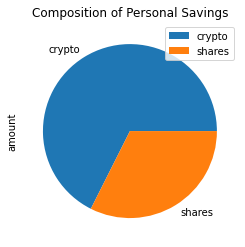

In [12]:
# Plot savings pie chart
# YOUR CODE HERE! Here we plot a pie chart using the .plot.pie function
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE! Obtain the total saving from the datafram created previously
total_savings = float(df_savings.sum())

# Validate saving health
# YOUR CODE HERE! Here we obtain the goal value by subtracting the total savings by the emergency fund and set the conditional terms to whether they do or do not have enough money in the emergency fund
goal_value = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.73  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.88  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.77  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.68  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.70  1421843   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-05-01 04:00:00+00:00       11008  108.743679  238.66  239.1700  238.195   
2017-05-02 04:00:00+00:00        9263  108.831870  238.82  238.9800  238.300   
2017-05-03 04:00:00+00:00       10987  108.902870  238.29  238.8775  237.700   
2017-05-04 04:00:00+00:00        7501  108.629678  238.81  238.9225  237.780   
2017-05-05 04:00:00+00:00        7385  108.675918  239.16  239.7200  238.680   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-05-01 04:00:00+00:00  238.68  66882521      180740  238.682276  
2017-05-02 04:00:00+00:00  238.77  57375732      176648  238.630973  
2017-05-03 04:00:00+00:00  238.48  73137731      223568  238.418100  
2017-05-04 04:00:00+00:00  238.76  61462732      208872  238.541805  
2017-05-05 04:00:00+00:00  239.70  62001269      204885  239.253410

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE! Using MCForecast tools we are able to create a Monte Carlo simulation
MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Daily.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.73  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.88  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.77  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.68  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.70  1421843   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-01 04:00:00+00:00       11008  108.743679          NaN  238.66   
2017-05-02 04:00:00+00:00        9263  108.831870     0.001380  238.82   
2017-05-03 04:00:00+00:00       10987  108.902870    -0.001010  238.29   
2017-05-04 04:00:00+00:00        7501  108.629678    -0.000827  238.81   
2017-05-05 04:00:00+00:00        7385  108.675918     0.000184  239.16   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-05-01 04:00:00+00:00  239.1700  238.195  238.68  66882521      180740   
2017-05-02 04:00:00+00:00  238.9800  238.300  238.77  57375732      176648   
2017-05-03 04:00:00+00:00  238.8775  237.700  238.48  73137731      223568   
2017-05-04 04:00:00+00:00  238.9225  237.780  238.76  61462732      208872   
2017-05-05 04:00:00+00:00  239.7200  238.680  239.70  62001269      204885   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-01 04:00:00+00:00  238.682276          NaN  
2017-05-02 04:00:00+00:00  238.630973     0.000377  
2017-05-03 04:00:00+00:00  238.418100    -0.001215  
2017-05-04 04:00:00+00:00  238.541805     0.001174  
2017-05-05 04:00:00+00:00  239.253410     0.003937

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE! We are able to calculate this using the .calc_cumulative_return function
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Marcus\Class Notes\Unit 5 Financial Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005424,1.010579,1.005327,1.005879,1.005411,0.995566,0.993685,1.011900,0.996076,1.009173,...,0.997131,1.004803,0.988297,0.989571,1.005567,1.001704,0.984983,1.011560,1.006089,0.996165
2,1.003346,1.017023,1.001611,1.000595,1.002994,0.974515,0.997745,1.001856,1.005165,1.005099,...,0.989103,1.019145,0.990353,0.996045,1.007727,1.011284,0.984616,1.008968,0.992072,0.990515
3,1.005305,1.015129,1.005010,1.007103,0.997669,0.963625,0.990997,1.008509,1.001760,0.983241,...,0.985106,1.010879,0.993445,0.997211,1.008062,1.000200,0.986744,1.006678,0.995510,0.986565
4,1.010446,1.029722,1.012598,1.008862,1.012019,0.961767,0.986469,1.008227,1.010089,0.982170,...,0.986504,1.008504,0.989821,0.999557,0.992062,0.999213,0.988075,1.008409,0.999746,0.972936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.786084,21.263699,9.422038,17.489768,10.219570,17.487285,11.909597,14.163398,21.708518,19.922953,...,24.929277,22.327381,40.605604,7.075276,20.999121,35.991118,19.302912,2.750638,26.814015,8.048889
7557,22.712670,21.363057,9.315500,17.769155,10.210525,17.769578,11.770059,14.063455,21.777450,19.994581,...,24.945262,22.419819,40.958018,7.097079,21.028856,35.546786,19.291971,2.738592,26.842183,8.095938
7558,22.618827,20.966027,9.340830,17.657554,10.254823,17.797899,11.668851,13.947274,21.697326,19.829721,...,25.201068,22.430201,41.134258,7.041043,21.054632,35.505840,19.398697,2.749643,27.036119,8.168381
7559,22.291782,21.185869,9.417951,17.572851,10.081897,17.904183,11.690444,13.825208,21.744565,19.852340,...,25.307033,22.709338,41.134844,7.080371,21.033237,35.758491,19.488991,2.740625,27.015277,8.179100


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

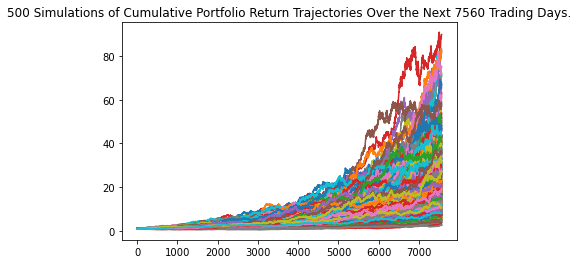

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE! We are able to do this using the .plot_simulation function
MC_Daily.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

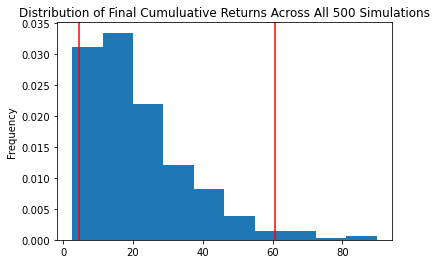

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE! We are able to do this using the .plot_distribution function
MC_Daily.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE! We are able to do this using the .summarize_cumulative_return function
stats = MC_Daily.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           500.000000
mean             21.507683
std              14.560095
min               2.572875
25%              10.715124
50%              17.676045
75%              28.370292
max              89.800424
95% CI Lower      4.510220
95% CI Upper     60.692629
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE! Here we are using the previous stats summary previously created to calculate this range
ci_lower = round(stats[8]*20000,2)
ci_upper = round(stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90204.41 and $1213852.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE! Here we are using the previous stats summary previously created to calculate this range
ci_lower = round(stats[8]*30000,2)
ci_upper = round(stats[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135306.61 and $1820778.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Marcus\Class Notes\Unit 5 Financial Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011332,0.998045,0.996600,0.999456,1.004787,1.009995,0.996322,1.001609,1.001423,0.989877,...,1.002047,1.005248,0.985655,1.011919,0.995467,0.989267,0.999941,1.008003,0.992799,0.976642
2,1.019349,1.004408,0.973647,1.000105,1.015608,1.007012,1.001217,0.998487,1.007317,1.006117,...,1.000230,0.993122,0.997024,1.025018,1.001458,0.992651,0.996581,1.003849,0.991017,0.983167
3,1.018766,1.003367,0.970685,0.993961,1.001790,1.011654,1.018271,0.989602,0.999623,1.009404,...,0.990675,0.991659,0.991848,1.009906,0.992874,0.988200,1.003267,1.003462,0.987030,0.998119
4,1.024765,1.013990,0.977621,1.005064,0.998273,1.017498,1.016489,0.990819,1.006734,1.007615,...,0.982216,0.997998,0.998828,0.999002,1.000973,0.991219,1.001290,1.010453,0.992233,1.005227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.743054,1.087687,1.953811,1.473047,1.434111,1.337128,1.577947,1.552071,1.795939,1.712949,...,1.131686,0.941256,1.615945,2.124626,2.546474,1.410459,1.567629,1.153526,1.468633,1.994705
1257,1.751078,1.083233,1.955300,1.477181,1.441499,1.343495,1.569271,1.539328,1.790118,1.697912,...,1.127117,0.936252,1.594168,2.119368,2.552754,1.413109,1.567881,1.152384,1.472944,2.002654
1258,1.760642,1.090715,1.940099,1.475153,1.442014,1.341513,1.585746,1.543086,1.769433,1.702634,...,1.134354,0.943379,1.602867,2.119096,2.566394,1.402439,1.567676,1.149985,1.471769,2.052313
1259,1.778090,1.094033,1.923303,1.473705,1.443619,1.351422,1.583381,1.530703,1.755396,1.699575,...,1.142314,0.946574,1.603424,2.119869,2.566620,1.409210,1.569693,1.159312,1.482616,2.080083


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

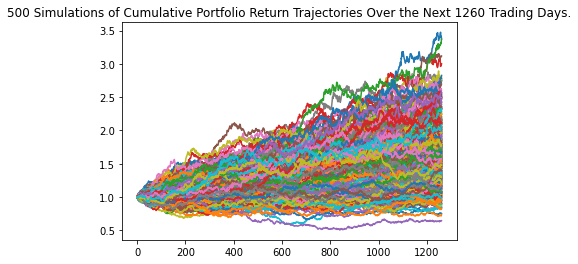

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

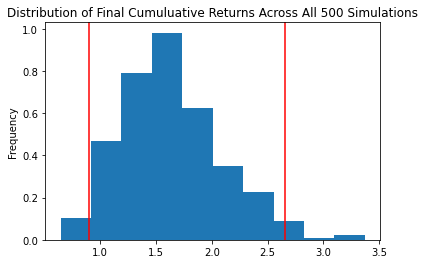

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           500.000000
mean              1.633022
std               0.449518
min               0.643160
25%               1.316833
50%               1.577350
75%               1.869428
max               3.370958
95% CI Lower      0.901065
95% CI Upper      2.650623
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 3
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(stats[8]*60000,2)
ci_upper_five = round(stats[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54063.9 and $159037.39


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Marcus\Class Notes\Unit 5 Financial Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996351,1.009214,0.996311,0.995387,1.000782,0.994829,0.993766,1.006410,0.997695,0.993863,...,0.997633,0.995041,1.003272,1.000610,1.000250,1.010563,1.000779,0.998555,1.010073,0.997016
2,0.991054,1.005359,0.997487,0.990803,0.996429,0.997880,0.988225,1.009033,1.013076,0.997396,...,0.988265,0.991841,1.008970,0.990159,1.014093,1.005385,0.973253,1.009401,1.005533,0.989709
3,0.983394,1.007240,0.997725,1.002103,0.992403,0.999789,0.985041,1.019376,1.011300,1.002500,...,0.992181,0.984444,1.008777,0.985718,1.013097,0.999516,0.974413,1.013372,1.003286,0.990584
4,0.984269,1.001264,0.999717,0.999057,1.000384,1.004434,0.986049,1.036737,1.006243,0.998044,...,1.001191,0.972888,1.011643,0.998027,1.018179,1.005303,0.976880,1.016465,1.005768,0.979765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.937318,4.012677,2.030695,2.638648,4.167407,3.227207,3.646799,3.842320,1.655863,4.527996,...,1.922704,2.298076,2.124431,2.561650,3.371882,1.619431,1.551620,2.553698,2.908326,1.990651
2517,1.917545,3.982456,2.037410,2.673610,4.216969,3.238401,3.621806,3.869983,1.693404,4.506252,...,1.916042,2.327040,2.137674,2.608199,3.297313,1.627055,1.541879,2.564379,2.891134,1.993284
2518,1.902778,3.984614,2.060447,2.680351,4.274035,3.226855,3.621464,3.912563,1.699438,4.523142,...,1.925787,2.315375,2.151776,2.642180,3.244528,1.626348,1.530184,2.543042,2.878354,1.958628
2519,1.905575,4.037024,2.055244,2.684902,4.260234,3.239507,3.618552,3.882422,1.701933,4.494947,...,1.915772,2.284980,2.156513,2.639780,3.230169,1.631781,1.518379,2.523979,2.851534,1.970878


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

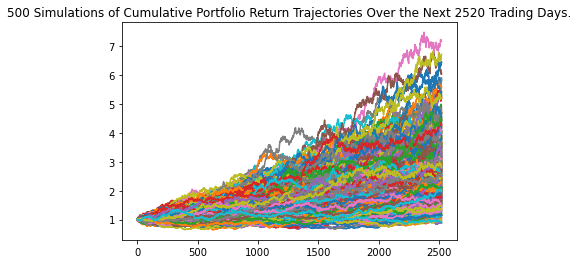

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

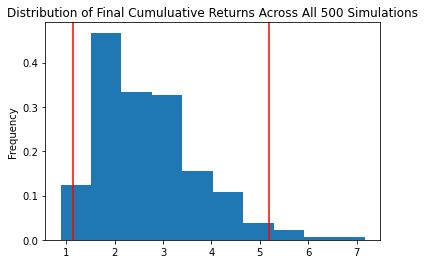

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_tenyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           500.000000
mean              2.676566
std               1.035209
min               0.882270
25%               1.896824
50%               2.511493
75%               3.230996
max               7.169821
95% CI Lower      1.149722
95% CI Upper      5.196275
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 3
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(stats[8]*60000,2)
ci_upper_ten = round(stats[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68983.32 and $311776.5
